In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler



In [6]:
cols=["fLength","fWidth","fSize","fConc","fConc1","fAsym","fM3Long","fM3Trans","fAlpha","fDist","class"]
df=pd.read_csv("magic04.data",names=cols)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [7]:
df["class"]=(df["class"]=="g").astype(int)

In [8]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


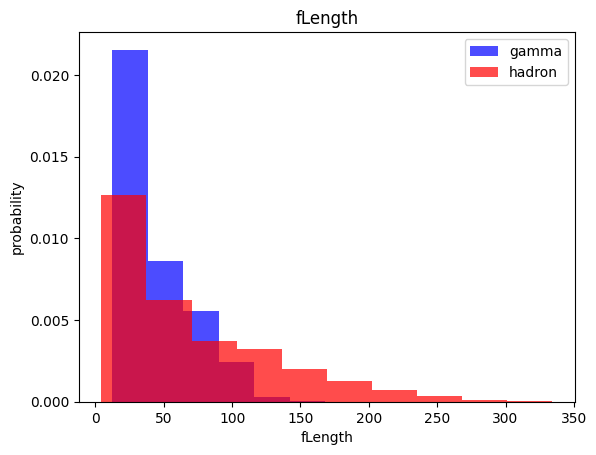

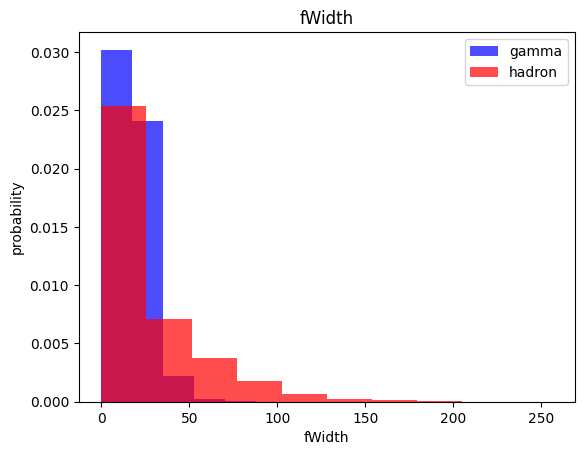

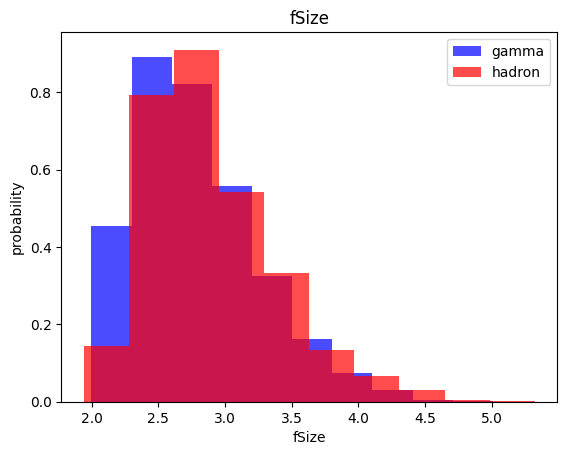

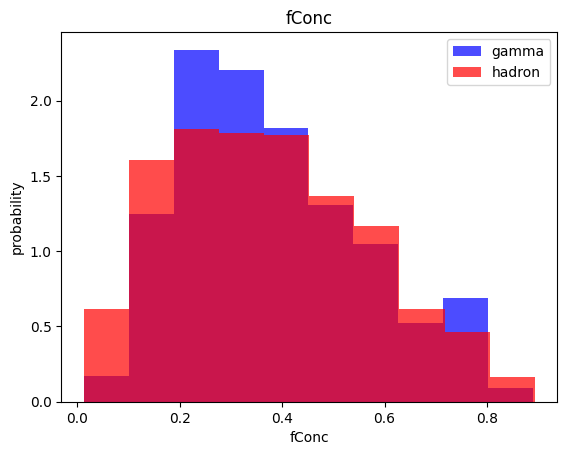

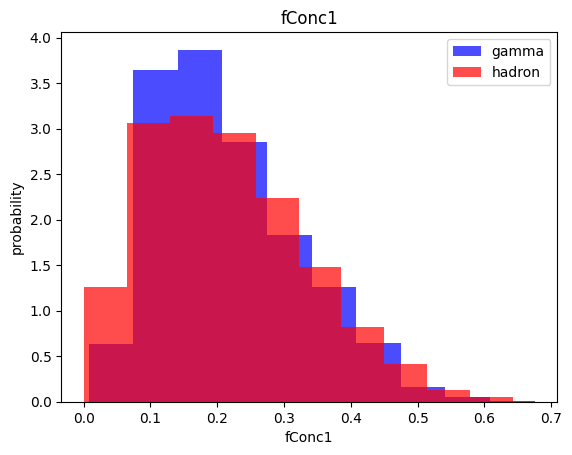

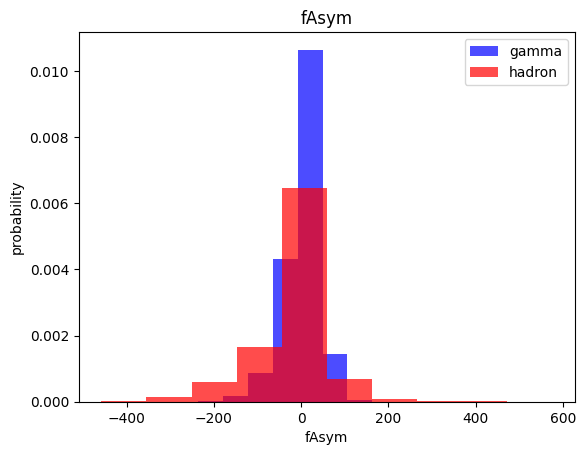

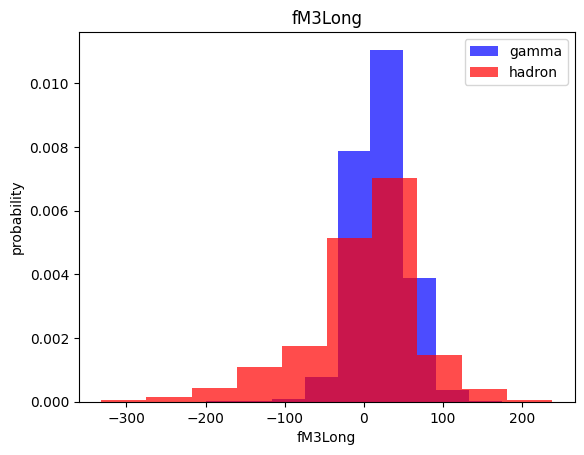

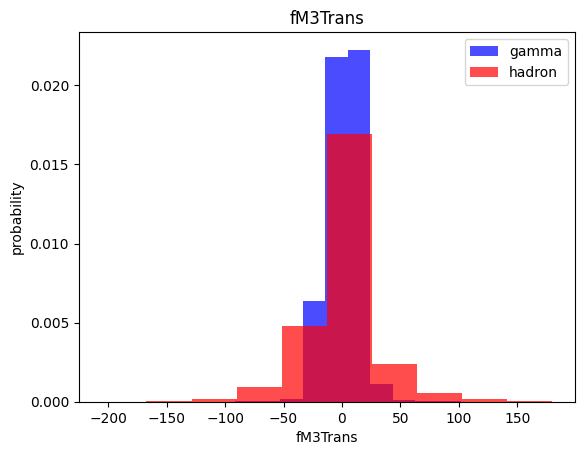

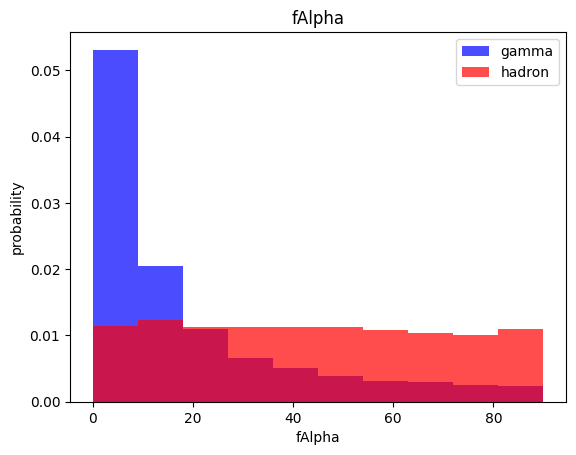

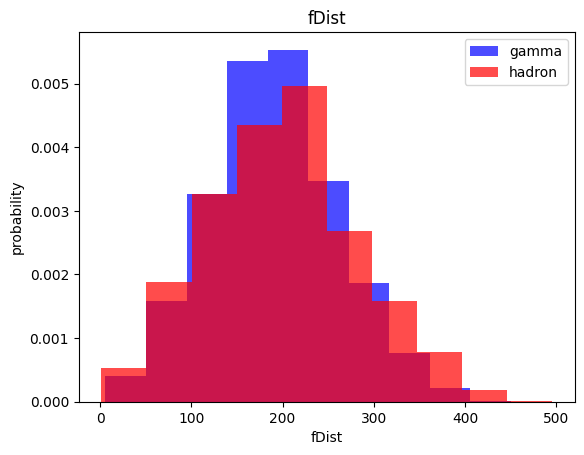

In [5]:
for label in cols[:-1]:
  plt.hist(df[df["class"]==1][label],color='blue',label='gamma',alpha=0.7,density=True)
  plt.hist(df[df["class"]==0][label],color='red',label='hadron',alpha=0.7,density=True)
  plt.title(label)
  plt.ylabel("probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [9]:
train, valid, test=np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df))])

In [16]:
def scale_dataset(dataframe,oversample=False):
  # x=dataframe[dataframe.columns[:-1]].values
  # y=dataframe[dataframe.columns[-1]].values
  x=dataframe[:, :-1]
  y=dataframe[:, -1]

  scaler=StandardScaler()
  x=scaler.fit_transform(x)

  if oversample:
    ros=RandomOverSampler()
    x,y=ros.fit_resample(x,y)


  data=np.hstack((x,np.reshape(y,(-1,1))))

  return data,x,y

In [17]:
train,x_train,y_train=scale_dataset(train,oversample=True)
valid,x_valid,y_valid=scale_dataset(train,oversample=False)
test,x_test,y_test=scale_dataset(train,oversample=False)

In [15]:
#sum(y_train==1)
sum(y_train==0)

7383

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [18]:
knn_model=KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train,y_train)

KNeighborsClassifier()

In [19]:
y_pred=knn_model.predict(x_test)
print(y_pred)

[1. 1. 1. ... 0. 0. 0.]


In [20]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.90      0.88      0.89      7383
         1.0       0.88      0.90      0.89      7383

    accuracy                           0.89     14766
   macro avg       0.89      0.89      0.89     14766
weighted avg       0.89      0.89      0.89     14766



In [21]:
y_test

array([1., 1., 1., ..., 0., 0., 0.])

Naive Bayes

In [22]:
from sklearn.naive_bayes import GaussianNB

In [23]:
nb_model=GaussianNB()
nb_model.fit(x_train,y_train)

GaussianNB()

In [24]:
y_pred=nb_model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.80      0.40      0.53      7383
         1.0       0.60      0.90      0.72      7383

    accuracy                           0.65     14766
   macro avg       0.70      0.65      0.62     14766
weighted avg       0.70      0.65      0.62     14766



Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
lg_model=LogisticRegression()
lg_model.fit(x_train,y_train)

LogisticRegression()

In [27]:
y_pred=lg_model.predict(x_test)


In [28]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.80      0.72      0.76      7383
         1.0       0.75      0.82      0.78      7383

    accuracy                           0.77     14766
   macro avg       0.77      0.77      0.77     14766
weighted avg       0.77      0.77      0.77     14766



Support Vector machine

In [29]:
from sklearn.svm import SVC
# importing support vector classifier

In [30]:
svm_model=SVC()
svm_model.fit(x_train,y_train)


SVC()

In [31]:
y_pred=svm_model.predict(x_test)

In [2]:
print(classification_report(y_test,y_pred))

NameError: name 'classification_report' is not defined

Neural Network

In [19]:
import tensorflow as tf
from tensorflow import keras

In [20]:
def plot_loss(history):
  plt.plot(history.history['loss'],label='loss')
  plt.plot(history.history['val_loss'],label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Binary crossentropy')
  plt.legend()
  plt.grid(True)
  plt.show()

def plot_accuracy(history):
  plt.plot(history.history['accuracy'],label='accuracy')
  plt.plot(history.history['val_accuracy'],label='val_accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('accuracy')
  plt.legend()
  plt.grid(True)
  plt.show()




In [21]:
def plot_history(history):
  fig, (ax1,ax2)=plt.subplots(1,2,figsize=(6,8))
  ax1.plot(history.history['loss'],label='loss')
  ax1.plot(history.history['val_loss'],label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'],label='accuracy')
  ax2.plot(history.history['val_accuracy'],label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('accuracy')
  plt.grid(True)

  plt.show()




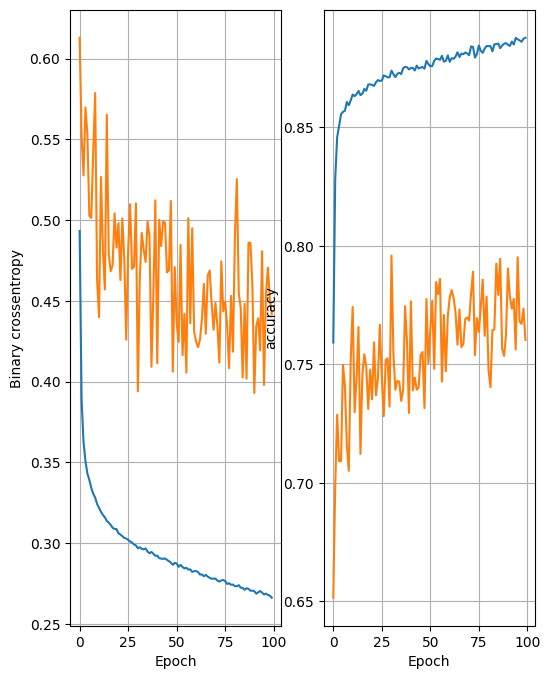

In [34]:
plot_history(history)

In [22]:
def train_model(x_train,y_tarin,num_nodes,dropout_prob,lr,batch_size,epochs):
  nn_model=tf.keras.Sequential([
    tf.keras.layers.Dense(num_nodes,activation='relu',input_shape=(10,)),
    tf.keras.layers.Dropout(dropout_prob),
    tf.keras.layers.Dense(num_nodes,activation='relu'),
    tf.keras.layers.Dropout(dropout_prob),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr),loss='binary_crossentropy',metrics=['accuracy'])
  history=nn_model.fit(
    x_train,y_train,epochs=epochs,batch_size=batch_size,validation_split=0.2,verbose=0
)
  return nn_model,history



16 nodes, dropout 0, lr0.01, batch size 16


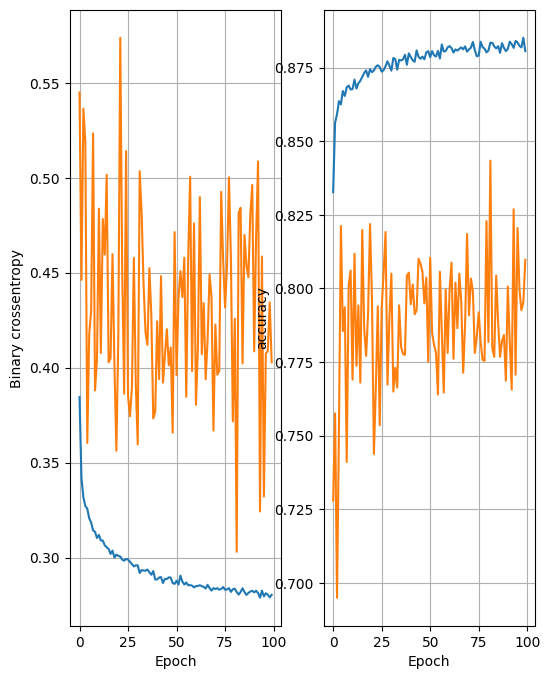

465/465 [==============================] - 1s 3ms/step - loss: 0.2995 - accuracy: 0.8692
16 nodes, dropout 0, lr0.01, batch size 32


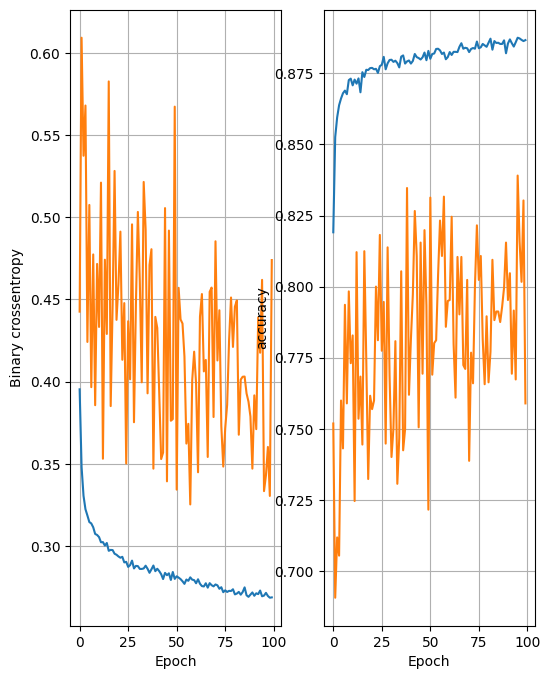

465/465 [==============================] - 1s 2ms/step - loss: 0.3059 - accuracy: 0.8624
16 nodes, dropout 0, lr0.01, batch size 64


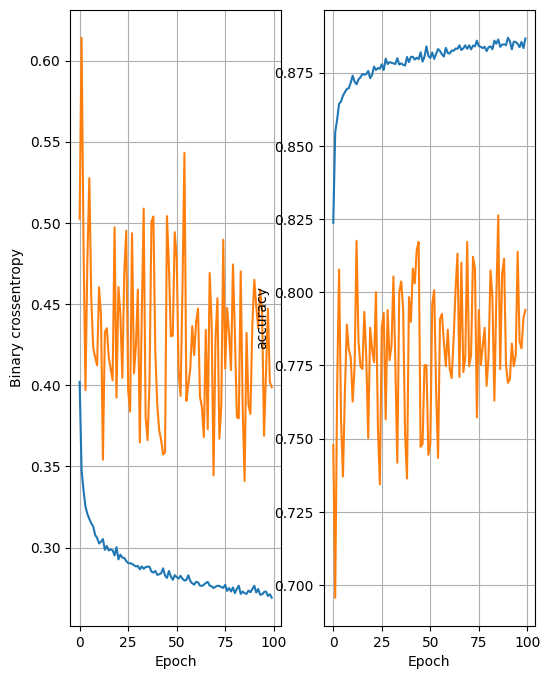

465/465 [==============================] - 1s 2ms/step - loss: 0.2902 - accuracy: 0.8696
16 nodes, dropout 0, lr0.01, batch size 128


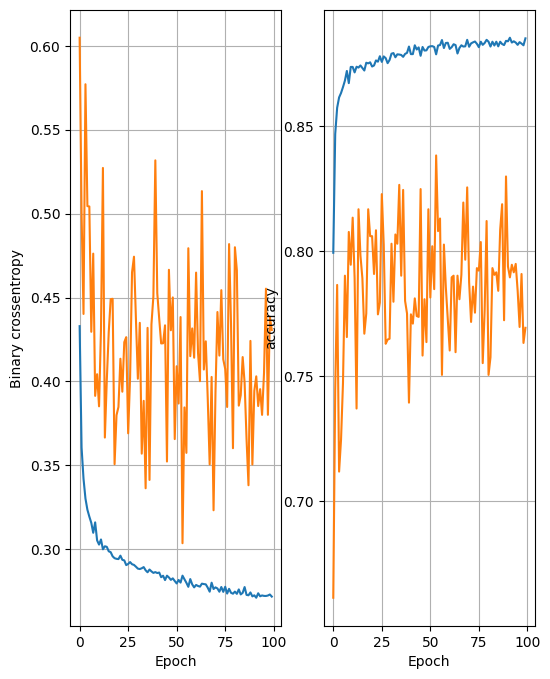

465/465 [==============================] - 1s 2ms/step - loss: 0.3030 - accuracy: 0.8604
16 nodes, dropout 0, lr0.005, batch size 16


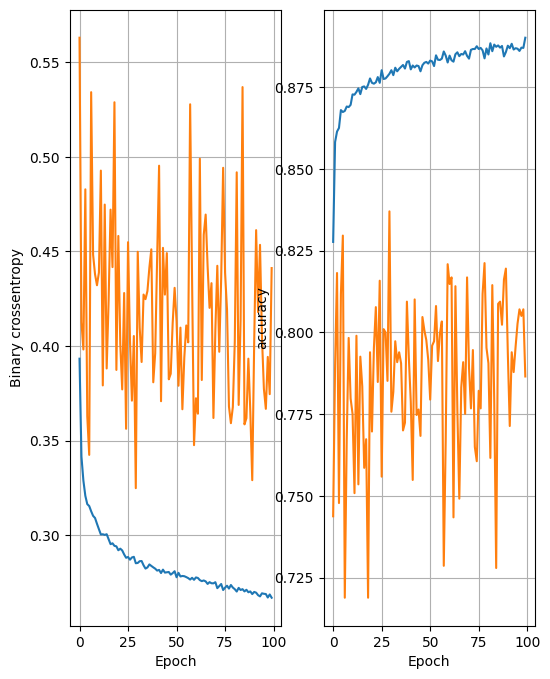

465/465 [==============================] - 1s 2ms/step - loss: 0.3070 - accuracy: 0.8708
16 nodes, dropout 0, lr0.005, batch size 32


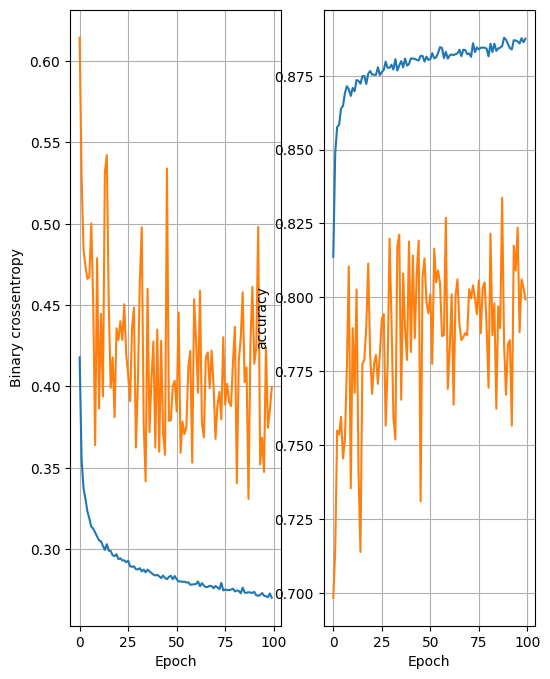

465/465 [==============================] - 1s 3ms/step - loss: 0.2945 - accuracy: 0.8709
16 nodes, dropout 0, lr0.005, batch size 64


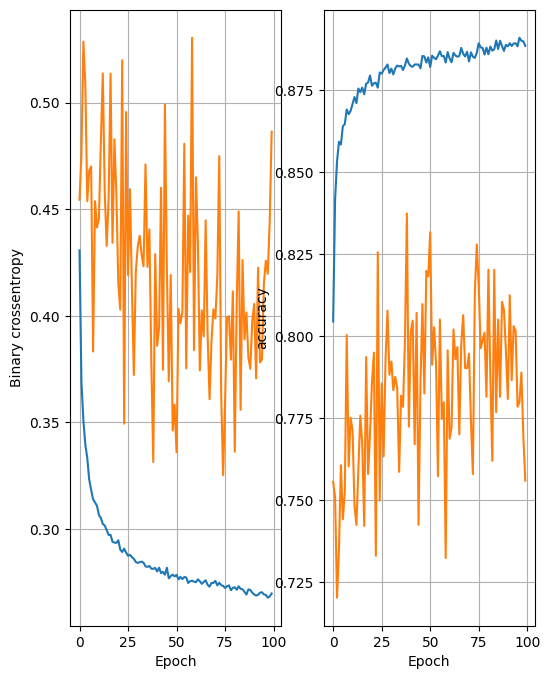

465/465 [==============================] - 1s 2ms/step - loss: 0.3107 - accuracy: 0.8618
16 nodes, dropout 0, lr0.005, batch size 128


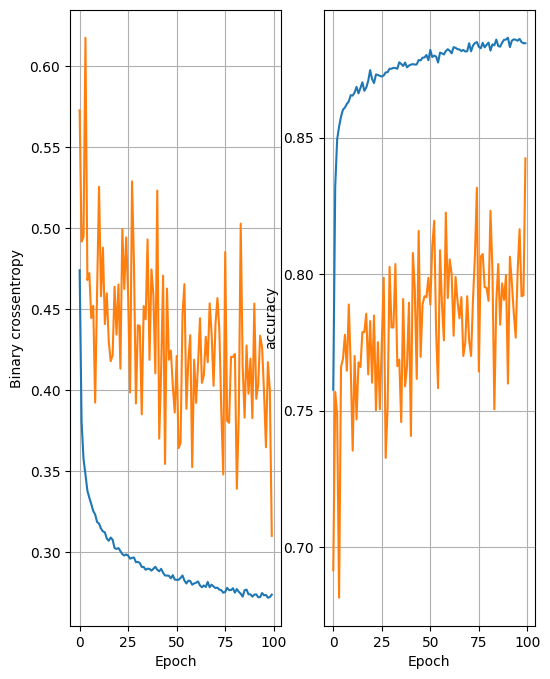

465/465 [==============================] - 1s 2ms/step - loss: 0.2828 - accuracy: 0.8738
16 nodes, dropout 0, lr0.001, batch size 16


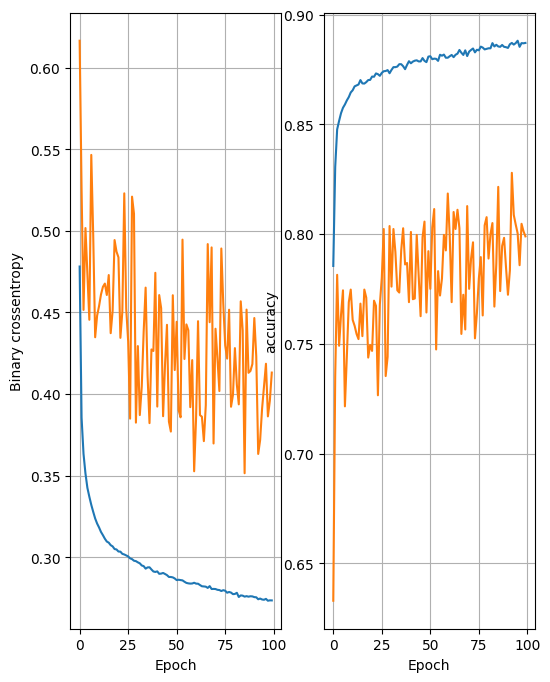

465/465 [==============================] - 1s 2ms/step - loss: 0.2970 - accuracy: 0.8724
16 nodes, dropout 0, lr0.001, batch size 32


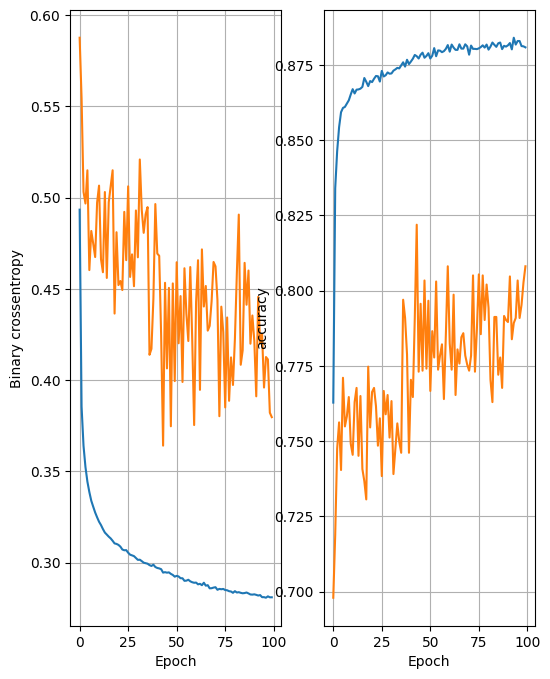

465/465 [==============================] - 1s 2ms/step - loss: 0.2993 - accuracy: 0.8677
16 nodes, dropout 0, lr0.001, batch size 64


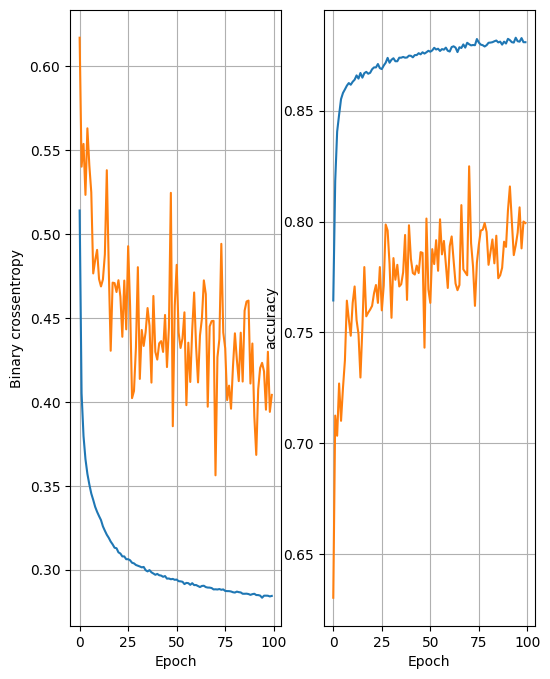

465/465 [==============================] - 1s 2ms/step - loss: 0.3053 - accuracy: 0.8654
16 nodes, dropout 0, lr0.001, batch size 128


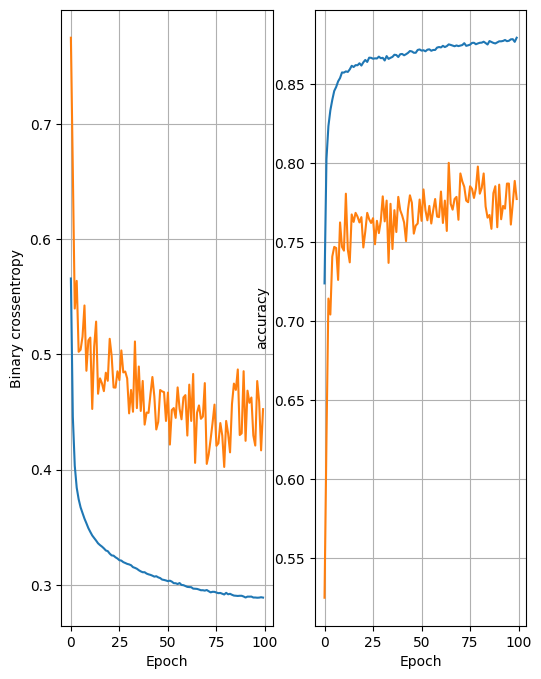

465/465 [==============================] - 1s 2ms/step - loss: 0.3194 - accuracy: 0.8587
16 nodes, dropout 0.2, lr0.01, batch size 16


In [ ]:
least_val_loss=float('inf')
least_loss_model=None
epochs=100
for num_nodes in [16,32,64]:
  for dropout_prob in [0,0.2]:
    for lr in [0.01,0.005,0.001]:
      for batch_size in [16,32,64,128]:
        print(f"{num_nodes} nodes, dropout {dropout_prob}, lr{lr}, batch size {batch_size}")
        model,history=train_model(x_train,y_train,num_nodes,dropout_prob,lr,batch_size,epochs)
        plot_history(history)
        val_loss=model.evaluate(x_valid,y_valid)[0]
        if val_loss < least_val_loss:
          least_val_loss=val_loss
          least_loss_model=model



In [1]:
y_pred=least_loss_model.predict(x_test)
y_pred=(y_pred>0.5).astype(int).reshape(-1,)
y_pred

NameError: name 'least_loss_model' is not defined

In [44]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.81      0.86      7375
         1.0       0.83      0.93      0.87      7375

    accuracy                           0.87     14750
   macro avg       0.87      0.87      0.87     14750
weighted avg       0.87      0.87      0.87     14750

